In [1]:
import omegaqe
from omegaqe.fields import Fields
import numpy as np
import matplotlib.pyplot as plt
from omegaqe.fisher import Fisher
from scipy.interpolate import InterpolatedUnivariateSpline
import omegaqe.postborn as postborn
from scipy import stats

In [2]:
fish = Fisher()

In [3]:
cosmo = fish.power.cosmo
omega_Ls, omega_ps_camb = cosmo.get_postborn_omega_ps(ellmax=8000)
omega_ps = postborn.omega_ps(omega_Ls)
omega_spline_mine = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

In [4]:
def _C_inv_splines(fields, L_max_map=5000, L_min_cut=30, L_max_cut=3000):
    C_inv = fish.covariance.get_C_inv(fields, L_max_map, 353e9)
    N_fields = np.size(list(fields))
    C_inv_splines = np.empty((N_fields, N_fields), dtype=InterpolatedUnivariateSpline)
    Ls = np.arange(L_max_map+1)
    for iii in range(N_fields):
        for jjj in range(N_fields):
            C_inv_ij = C_inv[iii, jjj]
            C_inv_ij[L_max_cut+1:] = 0
            C_inv_ij[:L_min_cut] = 0
            C_inv_splines[iii, jjj] = InterpolatedUnivariateSpline(Ls, C_inv_ij)
    return C_inv_splines

In [5]:
Ls = np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/kgI/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_kgI = InterpolatedUnivariateSpline(Ls, np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/kgI/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_kgI = _C_inv_splines("kgI")

CPU times: user 1min 22s, sys: 3.17 s, total: 1min 25s
Wall time: 16 s


In [6]:
fields = Fields("kgI", exp="SO", N_pix_pow=10, HDres=11)
omega_10_kgI = fields.get_omega_template(100, F_L_spline=F_L_spline_kgI, C_inv_spline=C_inv_spline_kgI, tracer_noise=True)


[0:01:43] 100%


[0:00:53] 100%
[0:00:55] 100%
[0:00:55] 100%
[0:00:55] 100%
[0:00:55] 100%


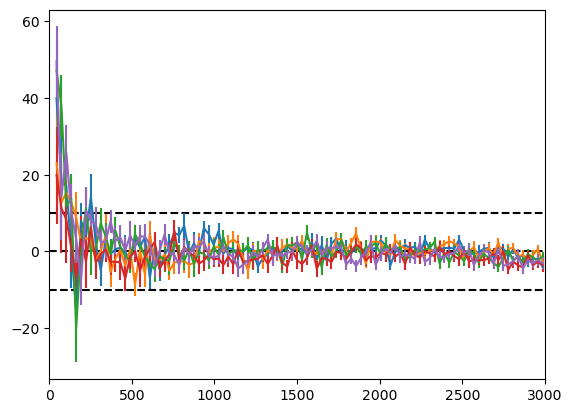

In [9]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")


for iii in range(5):
    N_pix_pow = 10
    fields = Fields("kgI", exp="SO", N_pix_pow=N_pix_pow)
    omega_10_kgI = fields.get_omega_template(100, F_L_spline=F_L_spline_kgI, C_inv_spline=C_inv_spline_kgI, tracer_noise=True)
    Lmap_10_kgI = fields.kM
    ps_10_kgI, kBins, errs_10_kgI = fields.get_ps_binned(omega_10_kgI, nBins=100, kmin=30, kmax=3000, kM=Lmap_10_kgI)
    fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_kgI(kBins)
    plt.errorbar(kBins, (fiducial - ps_10_kgI)/fiducial * 100, errs_10_kgI/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

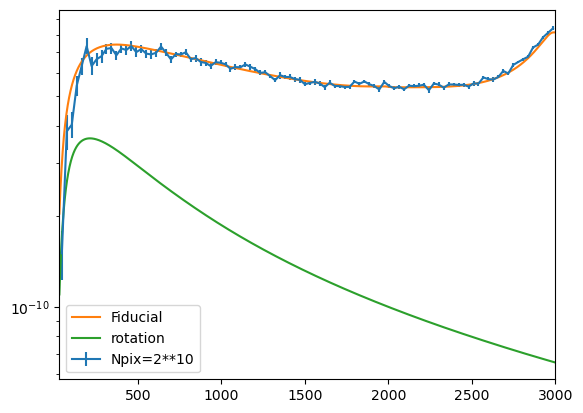

In [10]:
ps_10_kgI, kBins, errs_10_kgI = fields.get_ps_binned(omega_10_kgI, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_kgI, errs_10_kgI, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_kgI(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()

[0:09:58] 100%


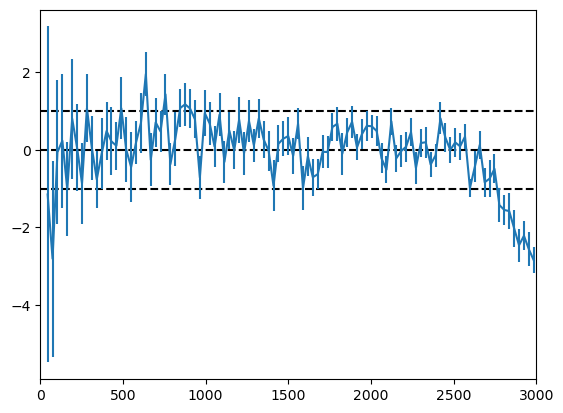

In [12]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[1,1], linestyle="--", color="k")
plt.plot([0,3000],[-1,-1], linestyle="--", color="k")


N_pix_pow = 12
fields = Fields("kgI", exp="SO", N_pix_pow=N_pix_pow)
omega_12_kgI = fields.get_omega_template(100, F_L_spline=F_L_spline_kgI, C_inv_spline=C_inv_spline_kgI, tracer_noise=True)
ps_12_kgI, kBins, errs_12_kgI = fields.get_ps_binned(omega_12_kgI, nBins=100, kmin=30, kmax=3000)
fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_kgI(kBins)
plt.errorbar(kBins, (fiducial - ps_12_kgI)/fiducial * 100, errs_12_kgI/fiducial * 100, label="12")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

In [13]:
Ls = np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/k/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_k = InterpolatedUnivariateSpline(Ls, np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/k/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_k = _C_inv_splines("k")

CPU times: user 301 ms, sys: 1.15 s, total: 1.45 s
Wall time: 151 ms


[0:00:33] 100%
[0:00:35] 100%
[0:00:35] 100%
[0:00:35] 100%
[0:00:34] 100%


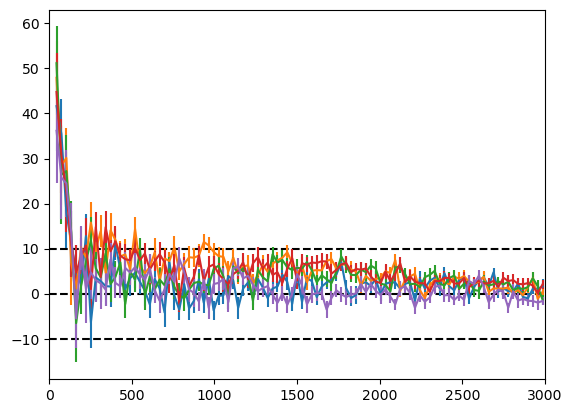

In [14]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")

fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_k(kBins)

for iii in range(5):
    N_pix_pow = 10
    fields = Fields("k", exp="SO", N_pix_pow=N_pix_pow)
    omega_10_k= fields.get_omega_template(100, F_L_spline=F_L_spline_k, C_inv_spline=C_inv_spline_k, tracer_noise=True)
    Lmap_10_k = fields.kM
    ps_10_k, kBins, errs_10_k = fields.get_ps_binned(omega_10_k, nBins=100, kmin=30, kmax=3000, kM=Lmap_10_k)
    plt.errorbar(kBins, (fiducial - ps_10_k)/fiducial * 100, errs_10_k/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

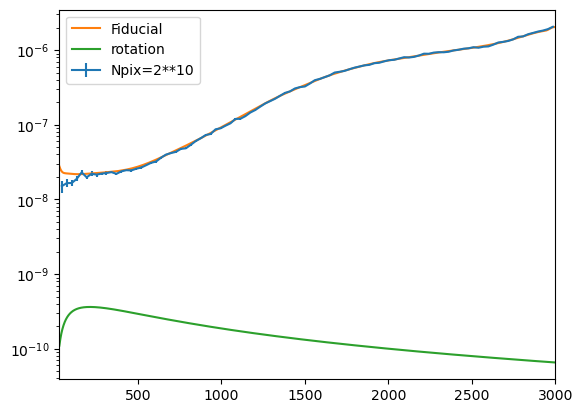

In [15]:
ps_10_k, kBins, errs_10_k = fields.get_ps_binned(omega_10_k, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_k, errs_10_k, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_k(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()

In [16]:
Ls = np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/g/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_g = InterpolatedUnivariateSpline(Ls, np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/g/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_g = _C_inv_splines("g")

CPU times: user 413 ms, sys: 144 ms, total: 558 ms
Wall time: 95.1 ms


[0:00:31] 100%
[0:00:31] 100%
[0:00:37] 100%
[0:00:34] 100%
[0:00:37] 100%


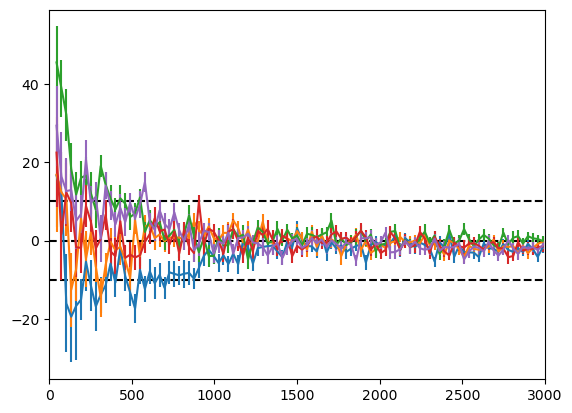

In [17]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")


for iii in range(5):
    N_pix_pow = 10
    fields = Fields("g", exp="SO", N_pix_pow=N_pix_pow)
    omega_10_g = fields.get_omega_template(100, F_L_spline=F_L_spline_g, C_inv_spline=C_inv_spline_g, tracer_noise=True)
    ps_10_g, kBins, errs_10_g = fields.get_ps_binned(omega_10_g, nBins=100, kmin=30, kmax=3000)
    fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_g(kBins)
    plt.errorbar(kBins, (fiducial - ps_10_g)/fiducial * 100, errs_10_g/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

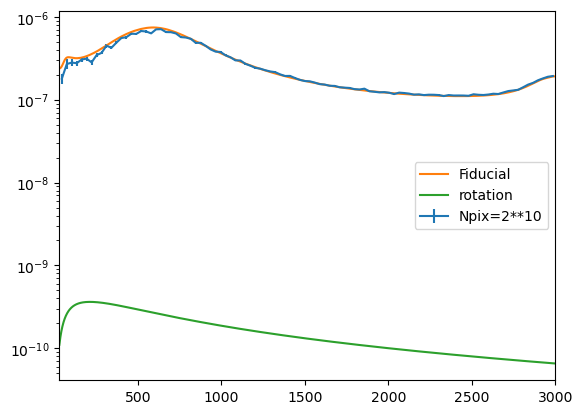

In [18]:
ps_10_g, kBins, errs_10_g = fields.get_ps_binned(omega_10_g, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_g, errs_10_g, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_g(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()

In [19]:
Ls = np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/I/SO/gmv/TEB/30_3000/1_2000/Ls.npy")
F_L_spline_I = InterpolatedUnivariateSpline(Ls, np.load(f"{omegaqe.RESULTS_DIR}/F_L_results/I/SO/gmv/TEB/30_3000/1_2000/F_L.npy"))
%time C_inv_spline_I = _C_inv_splines("I")

CPU times: user 195 ms, sys: 93.7 ms, total: 289 ms
Wall time: 120 ms


[0:00:54] 100%
[0:00:33] 100%
[0:00:32] 100%
[0:00:31] 100%
[0:00:32] 100%


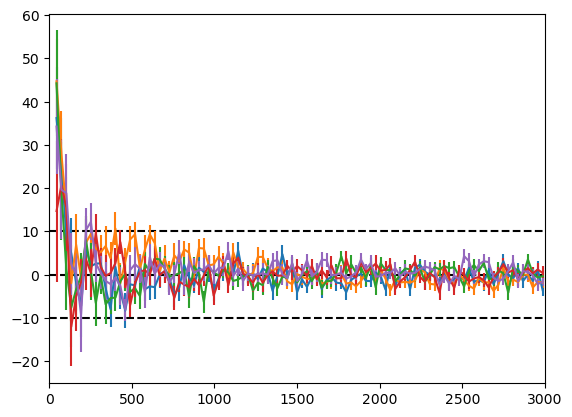

In [20]:
# Nchi 100
plt.plot([0,3000],[0,0], linestyle="--", color="k")
plt.plot([0,3000],[10,10], linestyle="--", color="k")
plt.plot([0,3000],[-10,-10], linestyle="--", color="k")

fiducial = (2 * np.pi) ** 2 *omega_spline_mine(kBins)/F_L_spline_I(kBins)

for iii in range(5):
    N_pix_pow = 10
    fields = Fields("I", exp="SO", N_pix_pow=N_pix_pow)
    omega_10_I = fields.get_omega_template(100, F_L_spline=F_L_spline_I, C_inv_spline=C_inv_spline_I, tracer_noise=True)
    Lmap_10_I = fields.kM
    ps_10_I, kBins, errs_10_I = fields.get_ps_binned(omega_10_I, nBins=100, kmin=30, kmax=3000, kM=Lmap_10_I)
    plt.errorbar(kBins, (fiducial - ps_10_I)/fiducial * 100, errs_10_I/fiducial * 100, label="10")


# plt.ylim(-4,4)
plt.xlim(0,3000)
plt.show()

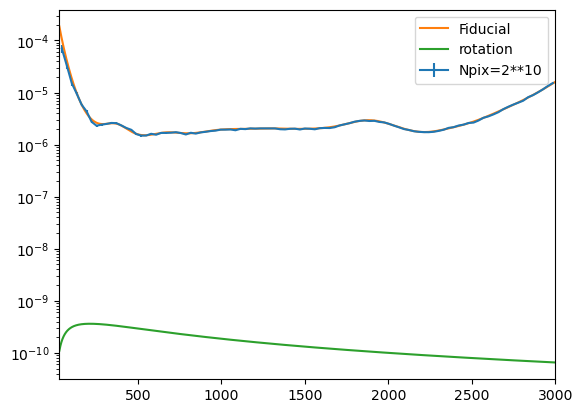

In [21]:
ps_10_I, kBins, errs_10_I = fields.get_ps_binned(omega_10_I, nBins=100, kmin=30, kmax=3000)

plt.errorbar(kBins, ps_10_I, errs_10_I, label=f"Npix=2**10")

Ls = np.arange(30, 3000)
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls)/F_L_spline_I(Ls), label="Fiducial")
plt.semilogy(Ls, (2 * np.pi) ** 2 * omega_spline_mine(Ls), label="rotation")
plt.xlim(30,3000)
plt.legend()